# Question 1

In [430]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import math
import numpy as np

## Load the Dataset

In [378]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [379]:
df=df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Preprocessing

### Data cleaning

#### Incomplete data

In [380]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Noisy values

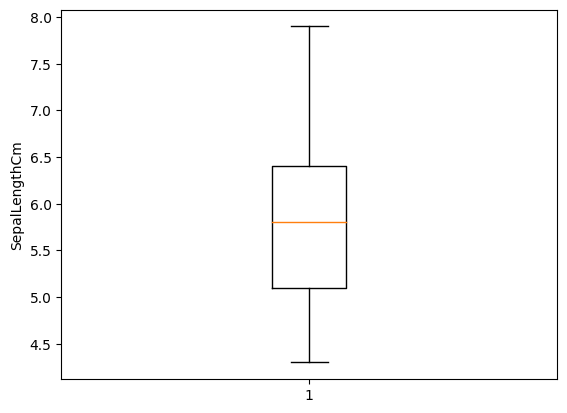

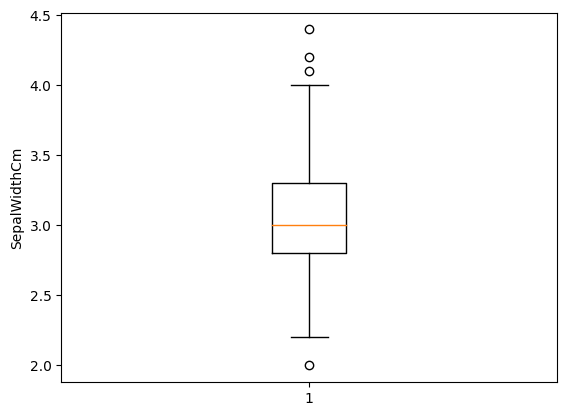

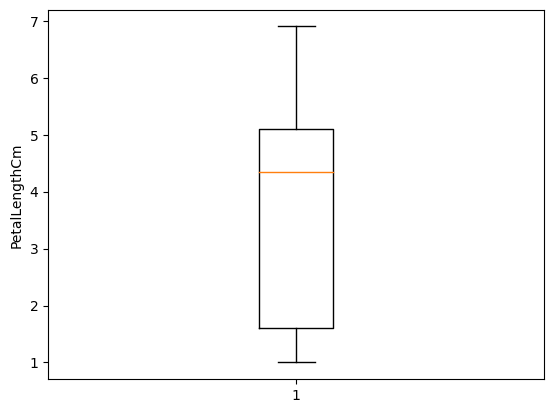

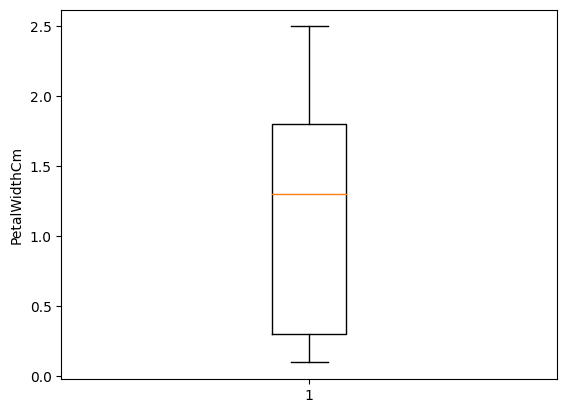

In [381]:
def print_noisy_val_graphs():
    for column_name in df.columns:
        if column_name!='Species':
            plt.boxplot(df[column_name])
            plt.ylabel(column_name)
            plt.show()

print_noisy_val_graphs()

#### Duplicated data

In [382]:
df.duplicated().sum()

3

In [383]:
df=df.drop_duplicates()
df=df.reset_index()
df=df.drop('index', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


### Data Transformation

#### Normalization

In [384]:
ss=StandardScaler()
dfstd=ss.fit_transform(df.iloc[:, 0:4])
df_normalized=df.iloc[:, 0:4].copy()
df_normalized['SepalLengthCm']=dfstd[:, 0]
df_normalized['SepalWidthCm']=dfstd[:, 1]
df_normalized['PetalLengthCm']=dfstd[:, 2]
df_normalized['PetalWidthCm']=dfstd[:, 3]
df_normalized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682
143,0.536792,-1.276136,0.695748,0.915085
144,0.778842,-0.128082,0.809831,1.047484
145,0.415766,0.790361,0.923913,1.444682


### Data Reduction

#### Low variance filter

In [385]:
df_normalized.var()

SepalLengthCm    1.006849
SepalWidthCm     1.006849
PetalLengthCm    1.006849
PetalWidthCm     1.006849
dtype: float64

#### High correlation filter

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

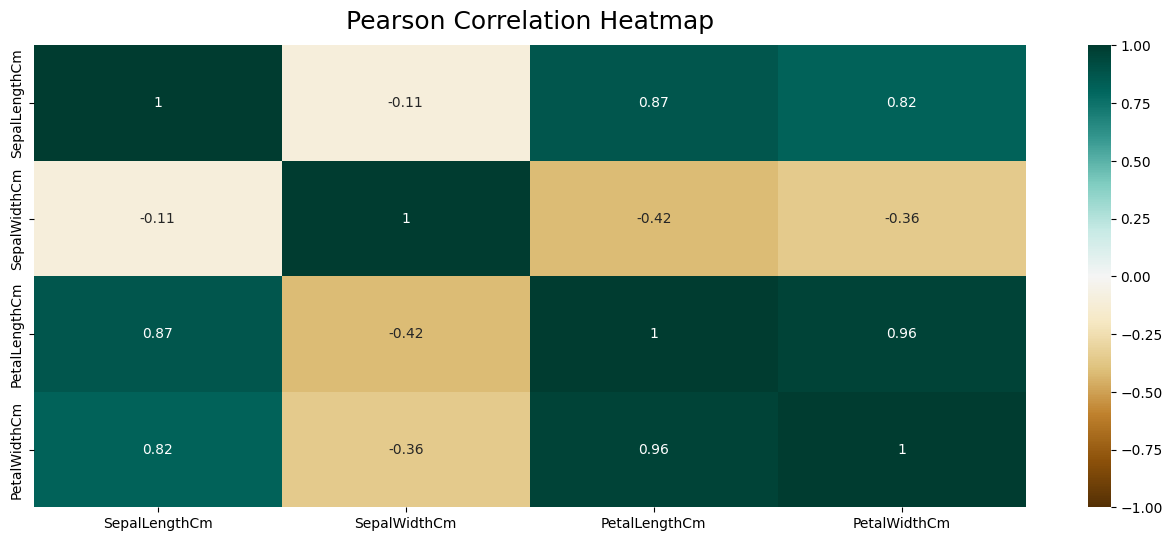

In [386]:
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df_normalized.iloc[:,:].corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap',fontdict={'fontsize':18},pad=12)

#### Features are highly correlated but are crucial to training the model => Not removed

### Data Encoding

#### One-hot encoder

In [387]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [388]:
encoder = OneHotEncoder()
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Species']]).toarray())
df=df.join(encoder_df)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,0,1,2
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
143,6.3,2.5,5.0,1.9,Iris-virginica,0.0,0.0,1.0
144,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
145,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


In [389]:
df=df.drop('Species', axis=1)
df.columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Iris-setosa', 'Iris-versicolor','Iris-virginica']
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,0.0,0.0,1.0
143,6.3,2.5,5.0,1.9,0.0,0.0,1.0
144,6.5,3.0,5.2,2.0,0.0,0.0,1.0
145,6.2,3.4,5.4,2.3,0.0,0.0,1.0


## Separate X & Y

In [390]:
X=df.iloc[:, 0:4].copy()
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
142,6.7,3.0,5.2,2.3
143,6.3,2.5,5.0,1.9
144,6.5,3.0,5.2,2.0
145,6.2,3.4,5.4,2.3


In [391]:
Y=df.iloc[:, 4:8].copy()
Y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
142,0.0,0.0,1.0
143,0.0,0.0,1.0
144,0.0,0.0,1.0
145,0.0,0.0,1.0


## Model Training

In [421]:
global model
model=[]
for i in range(0, 3):
    model.append(LinearRegression().fit(X.values, Y.iloc[:, i].values))


In [450]:
def SigmoidFunction(input):
    prob=[]
    
    for i in range(0, 3):
        prob.append( 1/(1 + math.exp(-model[i].predict(input))) )

    
    return prob.index(max(prob))

## Input

In [452]:
#x=[5.1, 3.5, 1.4, 0.2]     #Iris setosa
x=[6.1, 3.0, 4.6, 1.4]      #Iris versicolor
#x=[5.9, 3.0, 5.1, 1.8]     #Iris virginica

input=[[ x[0], x[1], x[2], x[3] ]]
output=SigmoidFunction(input)
if output==0:
    print("Iris setosa")
elif output==1:
    print("Iris versicolor")
elif output==2:
    print("Iris virginica")

Iris versicolor


# Question 2

## Load the dataset

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [42]:
df=pd.read_csv("exam6.csv", names=['test1', 'test2', 'admission'])
df

,test1,test2,admission
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


<AxesSubplot:xlabel='test1', ylabel='test2'>

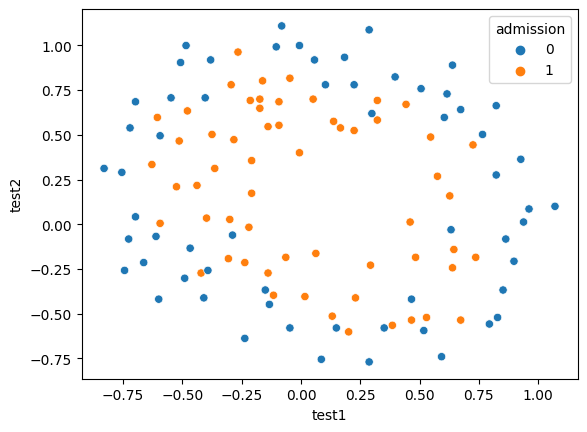

In [43]:
sns.scatterplot(x='test1', y='test2', hue='admission', data=df)

### Assume data is preprocessed

## Separate X & Y

In [44]:
X=df.iloc[:, 0:2]
X

,test1,test2
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


In [45]:
Y=df.iloc[:, 2]
Y

0      1
1      1
2      1
3      1
4      1
      ..
113    0
114    0
115    0
116    0
117    0
Name: admission, Length: 118, dtype: int64

## Model Training

In [ ]:
#Y given in the question is output of sigmoid function. Probabilites of admission is not given.
#We will have to train model on given Y meaning Logistic Regression cannot be used. Using Gradient Descent Optimization =>
def GradientDescent(lamda=0):
    
        
    no_of_iterations=1000
    alpha=1     #alpha=10 as given in the question, is too high of a learning rate -> Overshoots minimum
    
    for degree in range(2, 7):

        obj=PolynomialFeatures(degree=degree)
        X_poly=obj.fit_transform(X)
        no_of_rows, no_of_columns=X_poly.shape

        B=[0]*(no_of_columns)

        for iteration in range(0, no_of_iterations):
            
            new_B=[]
            for beta_index in range(0, len(B)):
                
                #cost=0
                sum=0
                for row_index in range(0, no_of_rows):
                    
                    BX_sum=0
                    for i in range(0, len(B)):
                        BX_sum=BX_sum + B[i]*X_poly[row_index][i]                            
                    
                    sum = sum + (BX_sum - Y[row_index]) * X_poly[row_index][beta_index]
        
        
                new_B_val = B[beta_index]*(1-alpha*lamda/no_of_rows) - (alpha/no_of_rows)*sum
                new_B.append(new_B_val)

            B=new_B

        Y_predicted=np.matmul(X_poly, B)
        print(f"degree={degree} R2 Score={r2_score(Y, Y_predicted)}")
        
    
   

In [ ]:
GradientDescent()

degree=2 R2 Score=0.5118657421541566
degree=3 R2 Score=0.5140414301431429
degree=4 R2 Score=0.5355003626590593
degree=5 R2 Score=0.5427361267756827
degree=6 R2 Score=0.5493422855191943


In [ ]:
GradientDescent(0.2)

degree=2 R2 Score=0.5087092309460584
degree=3 R2 Score=0.5099000035005175
degree=4 R2 Score=0.523149594387307
degree=5 R2 Score=0.5290907697202334
degree=6 R2 Score=0.5339333026639842


### Lambda=0 degree=6 gives us the best R2 score

In [54]:
no_of_iterations=1000
alpha=1     
lamda=0

obj=PolynomialFeatures(degree=6)
X_poly=obj.fit_transform(X)
no_of_rows, no_of_columns=X_poly.shape

B=[0]*(no_of_columns)

for iteration in range(0, no_of_iterations):
    
    new_B=[]
    for beta_index in range(0, len(B)):
        
        #cost=0
        sum=0
        for row_index in range(0, no_of_rows):
            
            BX_sum=0
            for i in range(0, len(B)):
                BX_sum=BX_sum + B[i]*X_poly[row_index][i]                            
            
            sum = sum + (BX_sum - Y[row_index]) * X_poly[row_index][beta_index]


        new_B_val = B[beta_index]*(1-alpha*lamda/no_of_rows) - (alpha/no_of_rows)*sum
        new_B.append(new_B_val)

    B=new_B

Y_predicted=np.matmul(X_poly, B)

for i in range(0, len(Y_predicted)):
    if Y_predicted[i]>=0.5:
        Y_predicted[i]=1
    else:
        Y_predicted[i]=0

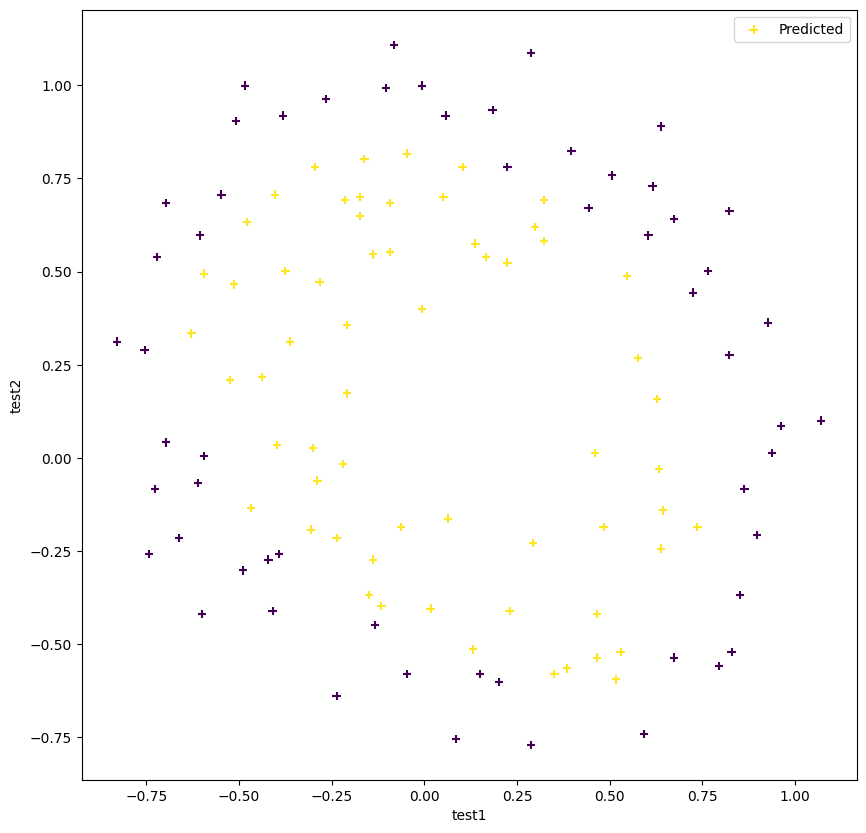

In [64]:
plt.figure(figsize=(10, 10))
plt.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, c=Y_predicted, marker='+', label='Predicted')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend()
plt.show()

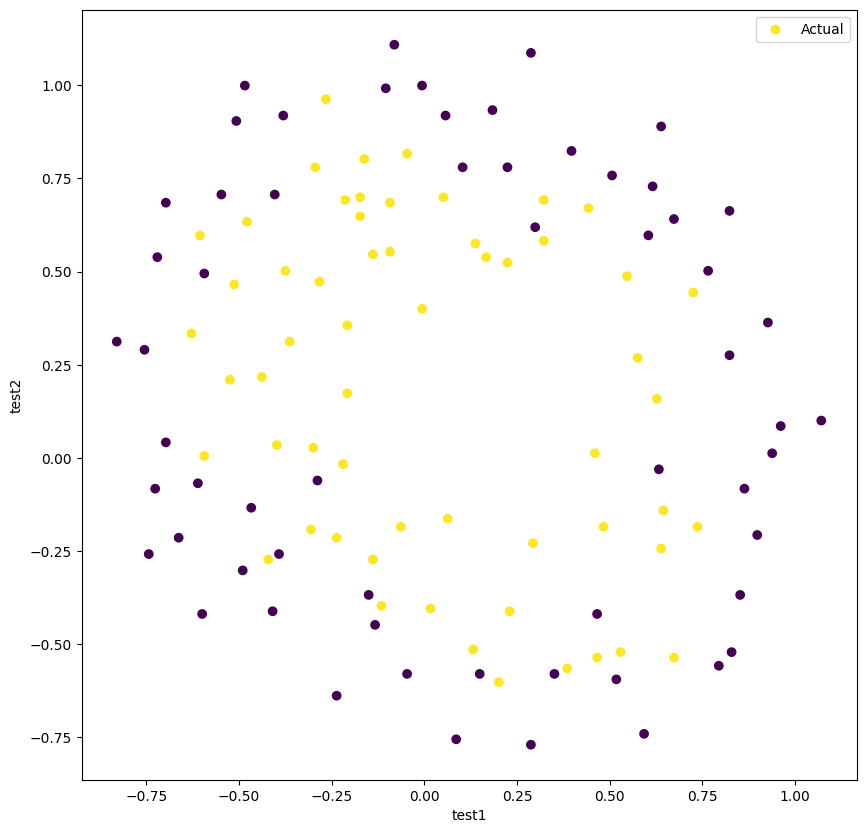

In [65]:
plt.figure(figsize=(10, 10))
plt.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, c=Y[:].values, label='Actual')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend()
plt.show()